In [1]:
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime  
import plotly.express as px
import plotly.express as px
  

In [2]:
sns.set(style='whitegrid',palette='muted')

customers_export = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/customers_export.csv')

order_over_time = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/orders_over_time_2023-10-18.csv')

returning_customers = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/returning_customers.csv')

sales_over_time = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/Sales over time_2023-10-18.csv')

sales = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/sales_2023-10-18_2024-10-16.csv')

sales_by_product = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/sales_by_product_2023-10-18.csv')

sales_by_traffic = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/sales_by_traffic_referrer_2023_.csv')

klaviyo_data = pd.read_excel(r'/home/juandi/Documents/TOM_JETSON/Data/cleaned_data_for_klaviyo.xlsx')

product_1 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/products_export_1.csv')

product_2 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/products_export_1.csv')

product_3 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/products_export_3.csv')

orders_1 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/orders_export_1.csv')

orders_2 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/orders_export_2.csv')

orders_3 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/orders_export_3.csv')

/tmp/ipykernel_98560/1417861701.py:19: DtypeWarning: Columns (10,13,27,32,45,46,47,49,50,51,52,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  product_1 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/products_export_1.csv')
/tmp/ipykernel_98560/1417861701.py:21: DtypeWarning: Columns (10,13,27,32,45,46,47,49,50,51,52,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  product_2 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/products_export_1.csv')
/tmp/ipykernel_98560/1417861701.py:25: DtypeWarning: Columns (20,52,53,56) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_1 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/orders_export_1.csv')
/tmp/ipykernel_98560/1417861701.py:27: DtypeWarning: Columns (20,45,52,53,56,66,68,76) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_2 = pd.read_csv(r'/home/juand

In [3]:
products_totals = pd.concat([product_1,product_2,product_3], ignore_index=True)

order_total = pd.concat([orders_1,orders_2,orders_3], ignore_index=True)

In [4]:
order_total.columns

Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', '

In [5]:
mediana = order_total['Subtotal'].median()

# Calcular el promedio (media) de la misma columna
promedio = order_total['Subtotal'].mean()

In [6]:
promedio

np.float64(87.25204442833127)

In [7]:
mediana

np.float64(67.15)

In [8]:
klaviyo_data=klaviyo_data.drop('Unnamed: 0', axis=1)

In [9]:
klaviyo_data.columns

Index(['Name', 'Customer: Billing Address City',
       'Customer: Billing Address State', 'PhoneNumber', 'Email',
       'Item: Department', 'ItemName', 'Source Sales: # of Tickets',
       'Source Sales: Net Sales', 'Source Sales: Net Qty Sold'],
      dtype='object')

In [10]:
klaviyo_data

Name Customer: Billing Address City  \
0     Abby Colombani                            NaN   
1     Abby Colombani                            NaN   
2     Abby Colombani                            NaN   
3         abby davis                            NaN   
4       abby gergits                            NaN   
...              ...                            ...   
5812     Zoe Kopanis                            NaN   
5813     Zoe Kopanis                            NaN   
5814     Zoe Kopanis                            NaN   
5815     Zoe Kopanis                            NaN   
5816     Zoe Kopanis                            NaN   

     Customer: Billing Address State   PhoneNumber                     Email  \
0                                NaN  1.630632e+10  Abby.colombani@gmail.com   
1                                NaN  1.630632e+10  Abby.colombani@gmail.com   
2                                NaN  1.630632e+10  Abby.colombani@gmail.com   
3                                NaN           NaN    abbymdavis25@gmail.com   
4                                NaN  1.773610e+10                       NaN   
...                              ...           ...                       ...   
5812                             NaN  1.708878e+10     fzkopanis@comcast.net   
5813                             NaN  1.708878e+10     fzkopanis@comcast.net   
5814                             NaN  1.708878e+10     fzkopanis@comcast.net   
5815                             NaN  1.708878e+10     fzkopanis@comcast.net   
5816                             NaN  1.708878e+10     fzkopanis@comcast.net   

     Item: Department                                      ItemName  \
0             DRESSES  Polka Dot Sleeveless Mini Dress Powder Blue    
1            Handbags                       Blakely Woven Bag Ivory   
2           Bracelets    Classic Gold .5mm Bracelet Love Gold Charm   
3             CANDLES                          Oz. Lakehouse Candle   
4               COATS         Marceau Houndstooth Coat Ivory Brown    
...               ...                                           ...   
5812            DENIM            VERVET MR Wide Leg Jean Vouchsafe    
5813          DRESSES                        Justine Dress Compote    
5814         SWEATERS      Boxy Sweater Top W/ Contrast Detail Red    
5815         SWEATERS         Scarf Hem Sleeveless Sweater Top Red    
5816        Basic Top                        Modern Slub Tee White    

      Source Sales: # of Tickets  Source Sales: Net Sales  \
0                              1                     89.0   
1                              1                     68.0   
2                              1                     52.0   
3                              1                     38.0   
4                              1                    138.0   
...                          ...                      ...   
5812                           1                     54.4   
5813                           1                     47.2   
5814                           1                     47.2   
5815                           1                     46.4   
5816                           1                     31.2   

      Source Sales: Net Qty Sold  
0                              1  
1                              1  
2                              1  
3                              1  
4                              1  
...                          ...  
5812                           1  
5813                           1  
5814                           1  
5815                           1  
5816                           1  

[5817 rows x 10 columns]

In [11]:
products_totals.columns

Index(['Handle', 'Title', 'Body (HTML)', 'Vendor', 'Product Category', 'Type',
       'Tags', 'Published', 'Option1 Name', 'Option1 Value',
       'Option1 Linked To', 'Option2 Name', 'Option2 Value',
       'Option2 Linked To', 'Option3 Name', 'Option3 Value',
       'Option3 Linked To', 'Variant SKU', 'Variant Grams',
       'Variant Inventory Tracker', 'Variant Inventory Qty',
       'Variant Inventory Policy', 'Variant Fulfillment Service',
       'Variant Price', 'Variant Compare At Price',
       'Variant Requires Shipping', 'Variant Taxable', 'Variant Barcode',
       'Image Src', 'Image Position', 'Image Alt Text', 'Gift Card',
       'SEO Title', 'SEO Description',
       'Google Shopping / Google Product Category', 'Google Shopping / Gender',
       'Google Shopping / Age Group', 'Google Shopping / MPN',
       'Google Shopping / Condition', 'Google Shopping / Custom Product',
       'Google Shopping / Custom Label 0', 'Google Shopping / Custom Label 1',
       'Google Shoppi

In [12]:
sales_by_traffic

referrer_source referrer_name  orders  total_sales
0           Direct           NaN    3554    353931.80
1           Search        Google    1203    122082.38
2           Social      Facebook     405     34570.39
3           Social     Instagram     212     21271.74
4           Search        Yahoo!      47      4671.28
5           Search          Bing      35      3358.08
6          Unknown     Dealspotr      25      3304.39
7          Unknown         Knoji       8      1410.69
8           Search    DuckDuckGo      17      1409.14
9          Unknown       Android      17      1108.52
10         Unknown       Shopify       6       834.55
11         Unknown  Sociablelabs       3       365.11
12         Unknown        Linktr       5       321.80
13         Unknown          Yelp       1       300.00
14          Social     Pinterest       5       210.70
15         Unknown    Downtowndg       1       170.28
16         Unknown     Microsoft       1       150.00
17         Unknown         Brave       1       107.00
18           Email         Gmail       1        63.20
19         Unknown           Com       1        63.20
20           Email   Outlook.com       1        42.23
21         Unknown     Earthlink       2        38.00
22         Unknown          Deal       1        36.80
23         Unknown    Mywishlist       1        34.10
24         Unknown       Elfster       1        29.70

In [13]:
sales_by_product 

product_title          product_vendor  \
0                            IN-STORE Gift Card           Vintage Charm   
1     Passport to Summer Fashion Show at IL Mio           Vintage Charm   
2                              ONLINE Gift Card           Vintage Charm   
3                    PRE ORDER Swiftie Ornament       Cody Foster & Co.   
4                           Beach Days Cardigan           Vintage Charm   
...                                         ...                     ...   
3135                          Fall Into You Top  Sanctuary Clothing LLC   
3136               Counting Rainbows Sweatshirt             By Together   
3137                            Dana Midi Dress             Current Air   
3138                               Demi Sweater             525 America   
3139                  *PRE ORDER* Lake Navy Top           Vintage Charm   

      product_type  net_quantity  gross_sales  discounts  returns  net_sales  \
0     Home & Gifts           121      10500.0    -326.25      0.0   10173.75   
1      Home & Gift            84       5950.0     -56.00    -70.0    5824.00   
2     Home & Gifts            77       5875.0     -76.25   -200.0    5598.75   
3              NaN           303       5472.0    -350.12    -18.0    5103.88   
4         Clothing            66       4696.0    -486.55   -163.2    4046.25   
...            ...           ...          ...        ...      ...        ...   
3135      Clothing            -1          0.0       0.00    -79.0     -79.00   
3136      Clothing            -1          0.0       0.00    -74.0     -74.00   
3137      Clothing            -1          0.0       0.00    -98.0     -98.00   
3138      Clothing            -1          0.0       0.00   -119.0    -119.00   
3139      Clothing            -3          0.0       0.00   -193.8    -193.80   

       taxes  total_sales  
0       0.00     10173.75  
1      40.62      5864.62  
2       0.00      5598.75  
3      88.88      5192.76  
4     324.30      4370.55  
...      ...          ...  
3135    0.00       -79.00  
3136   -7.41       -81.41  
3137    0.00       -98.00  
3138    0.00      -119.00  
3139   -5.78      -199.58  

[3140 rows x 10 columns]

In [14]:
sales 

api_client_title  orders  gross_sales  discounts   returns  net_sales  \
0          Online Store    5345    589354.99  -55573.86 -56188.79  477592.34   
1  Facebook & Instagram     115     12465.84   -1512.90   -991.00    9961.94   
2           CommentSold      40      4343.95    -163.10   -304.03    3876.82   
3                  Shop      29      3578.85    -262.00   -228.20    3088.65   
4                TikTok      14       587.98       0.00    -59.98     528.00   
5          Draft Orders      11      1010.83    -365.88   -309.40     335.55   

   shipping     taxes  total_sales  
0   19589.0  32634.05    529815.39  
1     593.0    847.12     11402.06  
2      96.0    285.79      4258.61  
3     152.0    136.02      3376.67  
4      88.0     39.58       655.58  
5      33.0      8.22       376.77

In [15]:
sales_over_time

product_title          product_vendor  \
0                            IN-STORE Gift Card           Vintage Charm   
1     Passport to Summer Fashion Show at IL Mio           Vintage Charm   
2                              ONLINE Gift Card           Vintage Charm   
3                    PRE ORDER Swiftie Ornament       Cody Foster & Co.   
4                           Beach Days Cardigan           Vintage Charm   
...                                         ...                     ...   
3135                          Fall Into You Top  Sanctuary Clothing LLC   
3136               Counting Rainbows Sweatshirt             By Together   
3137                            Dana Midi Dress             Current Air   
3138                               Demi Sweater             525 America   
3139                  *PRE ORDER* Lake Navy Top           Vintage Charm   

      product_type  net_quantity  gross_sales  discounts  returns  net_sales  \
0     Home & Gifts           121      10500.0    -326.25      0.0   10173.75   
1      Home & Gift            84       5950.0     -56.00    -70.0    5824.00   
2     Home & Gifts            77       5875.0     -76.25   -200.0    5598.75   
3              NaN           303       5472.0    -350.12    -18.0    5103.88   
4         Clothing            66       4696.0    -486.55   -163.2    4046.25   
...            ...           ...          ...        ...      ...        ...   
3135      Clothing            -1          0.0       0.00    -79.0     -79.00   
3136      Clothing            -1          0.0       0.00    -74.0     -74.00   
3137      Clothing            -1          0.0       0.00    -98.0     -98.00   
3138      Clothing            -1          0.0       0.00   -119.0    -119.00   
3139      Clothing            -3          0.0       0.00   -193.8    -193.80   

       taxes  total_sales  
0       0.00     10173.75  
1      40.62      5864.62  
2       0.00      5598.75  
3      88.88      5192.76  
4     324.30      4370.55  
...      ...          ...  
3135    0.00       -79.00  
3136   -7.41       -81.41  
3137    0.00       -98.00  
3138    0.00      -119.00  
3139   -5.78      -199.58  

[3140 rows x 10 columns]

In [16]:
returning_customers

full_name                   email accepts_email_marketing  \
0       Deanne Callahan    deanne0307@yahoo.com                     Yes   
1          Jaime Weibel     jlweibel3@gmail.com                     Yes   
2      JoAnne Androwich          andro8@aol.com                     Yes   
3        Taylor Carrara    tacarrara8@gmail.com                     Yes   
4        Kathleen Stack      kbsta123@yahoo.com                     Yes   
...                 ...                     ...                     ...   
4692     Paige Rambeaux  paigegershak@gmail.com                      No   
4693  Brendan Stepuszek       stepuszek@slu.edu                      No   
4694         Lia Haleas      purch005@gmail.com                      No   
4695    Andrea Costanzo      giac1993@yahoo.com                     Yes   
4696  Katherine Grissim      kgrissim@gmail.com                     Yes   

               first_order_date            last_order_date  \
0     2020-05-06T10:14:18-05:00  2024-09-17T07:44:51-05:00   
1     2019-07-13T22:43:39-05:00  2024-10-15T10:42:35-05:00   
2     2018-07-11T17:24:38-05:00  2024-06-06T20:25:05-05:00   
3     2020-01-27T14:52:21-06:00  2023-11-25T22:13:10-06:00   
4     2015-05-09T15:31:08-05:00  2023-12-09T10:52:12-06:00   
...                         ...                        ...   
4692  2022-04-19T20:53:09-05:00  2023-04-18T22:07:46-05:00   
4693  2017-06-28T18:29:53-05:00  2017-06-30T20:16:03-05:00   
4694  2019-05-02T13:24:10-05:00  2019-05-02T13:33:40-05:00   
4695  2023-06-01T22:16:02-05:00  2023-06-06T20:38:12-05:00   
4696  2022-04-12T22:24:22-05:00  2022-04-15T08:23:03-05:00   

      total_number_of_orders  total_average_order_value  total_amount_spent  
0                         59                    176.966            10441.01  
1                         60                    165.153             9909.19  
2                         59                    141.294             8336.39  
3                         66                    120.478             7951.61  
4                         53                    148.501             7870.60  
...                      ...                        ...                 ...  
4692                       2                      0.000                0.00  
4693                       2                      0.000                0.00  
4694                       2                      0.000                0.00  
4695                       2                      0.000                0.00  
4696                       2                      0.000                0.00  

[4697 rows x 8 columns]

In [17]:
order_over_time 

hour  orders  average_units_ordered  average_order_value  \
0     2023-10-18 00:00:00       1                    3.0               170.00   
1     2023-10-18 01:00:00       0                    0.0                 0.00   
2     2023-10-18 02:00:00       0                    0.0                 0.00   
3     2023-10-18 03:00:00       0                    0.0                 0.00   
4     2023-10-18 04:00:00       0                    0.0                 0.00   
...                   ...     ...                    ...                  ...   
8755  2024-10-16 19:00:00       0                    0.0                 0.00   
8756  2024-10-16 20:00:00       0                    0.0                 0.00   
8757  2024-10-16 21:00:00       2                    2.0               172.35   
8758  2024-10-16 22:00:00       1                    1.0                71.20   
8759  2024-10-16 23:00:00       1                    1.0                74.00   

      returned_item_quantity_abs  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
8755                           0  
8756                           0  
8757                           0  
8758                           0  
8759                           0  

[8760 rows x 5 columns]

In [18]:
customers_export.columns

Index(['Customer ID', 'First Name', 'Last Name', 'Email',
       'Accepts Email Marketing', 'Default Address Company',
       'Default Address Address1', 'Default Address Address2',
       'Default Address City', 'Default Address Province Code',
       'Default Address Country Code', 'Default Address Zip',
       'Default Address Phone', 'Phone', 'Accepts SMS Marketing',
       'Total Spent', 'Total Orders', 'Note', 'Tax Exempt', 'Tags'],
      dtype='object')

# SEGMENTACION CLIENTE

In [19]:
klaviyo_data['Name'] = klaviyo_data['Name'].str.strip().str.lower()
klaviyo_data['ItemName'] = klaviyo_data['ItemName'].str.strip().str.lower()

duplicated_check = klaviyo_data.groupby(['Name', 'ItemName']).size().reset_index(name='purchase_count')
duplicated_check[duplicated_check['purchase_count'] > 1].head()

product_preferences = klaviyo_data.groupby(['Name', 'ItemName']).agg(
    total_qty=('Source Sales: Net Qty Sold', 'sum'),
    total_sales=('Source Sales: Net Sales', 'sum')
).reset_index()

top_product_per_customer = product_preferences.loc[product_preferences.groupby('Name')['total_qty'].idxmax()]

total_spent_per_customer = klaviyo_data.groupby('Name')['Source Sales: Net Sales'].sum().reset_index()
total_spent_per_customer.rename(columns={'Source Sales: Net Sales': 'total_spent'}, inplace=True)

final_result = pd.merge(top_product_per_customer, total_spent_per_customer, on='Name')

final_result = final_result.sort_values(by='total_qty', ascending=False)

final_result.head()


Name                             ItemName  total_qty  \
992   katherine o'neill          assorted bitchstix lip balm          6   
470     debbie scarlati                  nora fleming mini's          6   
1947       susie hurley                  nora fleming mini's          6   
1063     kelly carkhuff                  nora fleming mini's          4   
348      cheryl caveney  nest oz. votive candle pumpkin chai          4   

      total_sales  total_spent  
992          60.0       638.00  
470         102.0       201.00  
1947        102.0       280.00  
1063         68.0       283.00  
348          96.0       204.95

In [20]:
print(order_total['Created at'].head())

0    2024-10-17 19:40:03 -0500
1    2024-10-17 19:40:03 -0500
2    2024-10-17 19:40:03 -0500
3    2024-10-17 19:13:01 -0500
4    2024-10-17 11:59:32 -0500
Name: Created at, dtype: object


In [21]:
order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce', utc=True)
order_total['purchase_hour'] = order_total['Created at'].dt.strftime('%I %p')  # Formato 12 horas (AM/PM)

purchase_hours = order_total.groupby(['Email', 'purchase_hour']).size().reset_index(name='purchase_count')

max_purchase_counts = purchase_hours.groupby('Email')['purchase_count'].transform(max)
preferred_hours = purchase_hours[purchase_hours['purchase_count'] == max_purchase_counts]

preferred_hours = preferred_hours.sort_values(by=['Email', 'purchase_hour'])

preferred_hours.head()


/tmp/ipykernel_98560/2456574766.py:6: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_purchase_counts = purchase_hours.groupby('Email')['purchase_count'].transform(max)


Email purchase_hour  purchase_count
0     0215lizzy@comcast.net         04 AM               2
1    1040paus@sbcglobal.net         12 PM               1
2       12ewalton@gmail.com         12 PM               7
3  1365miller@sbcglobal.net         03 AM               1
4     1387bridget@gmail.com         07 PM               1

In [22]:
rfm = customers_export[['Email','Total Spent','Total Orders']].copy()

rfm['Recency']=30

rfm['RFM_score']=(rfm['Total Spent'].rank(ascending=False)+
                  rfm['Total Orders'].rank(ascending=True))

top_customer = rfm.sort_values('RFM_score', ascending=True).head(10)
top_customer

Email  Total Spent  Total Orders  Recency  \
23354             mlereno@gmail.com      1591.92             1       30   
23709          intlnabers@gmail.com       911.65             1       30   
13019            ksvaicer@yahoo.com       840.00             1       30   
27683          jamie_zink@zeeco.com       724.00             1       30   
20986  kristeblmariottini@yahoo.com       718.37             1       30   
25702          mollymaci3@gmail.com       594.83             1       30   
29889         nikkikatris@gmail.com       579.90             1       30   
20628      colleen.n.aque@gmail.com       556.20             1       30   
13083           colleenmcmh@aol.com       542.72             1       30   
22626    carolinegreen328@gmail.com       538.21             1       30   

       RFM_score  
23354    21889.0  
23709    22126.0  
13019    22171.0  
27683    22298.5  
20986    22305.0  
25702    22473.0  
29889    22498.0  
20628    22547.0  
13083    22586.0  
22626    22595.0

In [23]:
email_marketing_customers = customers_export[customers_export['Accepts Email Marketing']=='yes']
top_mail_customers = email_marketing_customers.sort_values(by='Total Spent', ascending=False).head(10)

top_mail_customers[['Email','Total Spent']]

Email  Total Spent
9089         deanne0307@yahoo.com     10441.01
2914          jlweibel3@gmail.com      9909.19
1582               andro8@aol.com      8336.39
3993         tacarrara8@gmail.com      7951.61
69             kbsta123@yahoo.com      7870.60
2631          katieg8@comcast.net      6647.17
926                phigle@aol.com      6399.68
2182          jenbren64@gmail.com      6335.32
621    kristensmith1015@gmail.com      6268.37
10461          jenn.cotton@me.com      6005.77

In [24]:
import plotly.graph_objects as go


df = pd.read_csv('colores_extraidos.csv')

df['Created at'] = pd.to_datetime(df['Created at'])

df = df[(df['Created at'].dt.month.isin([10, 11])) & (df['Created at'].dt.year == 2023)]

df_exploded = df.assign(Extracted_Colors=df['Colores Extraidos'].str.split(', ')).explode('Extracted_Colors')

df_exploded['Extracted_Colors'] = df_exploded['Extracted_Colors'].str.strip()
df_exploded = df_exploded[df_exploded['Extracted_Colors'] != 'Sin Color']

df_exploded['Day_Of_Week'] = df_exploded['Created at'].dt.day_name()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_exploded['Day_Of_Week'] = pd.Categorical(df_exploded['Day_Of_Week'], categories=ordered_days, ordered=True)


def generate_top5_chart(df, month):
    """
    Generates a line chart with markers for the top 5 most frequent colors in a specific month.
    """
    df_month = df[df['Created at'].dt.month_name() == month]

    top5_colors = df_month['Extracted_Colors'].value_counts().nlargest(5).index

    df_month_top5 = df_month[df_month['Extracted_Colors'].isin(top5_colors)]

    # Count the frequency by day of the week
    weekly_frequency = df_month_top5.groupby(['Day_Of_Week', 'Extracted_Colors']).size().reset_index(name='Frequency')

    # Initialize the figure
    fig = go.Figure()

    # Add a trace for each color with the corresponding line color
    for color in top5_colors:
        color_data = weekly_frequency[weekly_frequency['Extracted_Colors'] == color]
        fig.add_trace(
            go.Scatter(
                x=color_data['Day_Of_Week'], 
                y=color_data['Frequency'], 
                mode='lines+markers',
                name=color,
                line=dict(color=color.lower()),  # Use the color name directly
                marker=dict(size=8)  # Adjust marker size for better visibility
            )
        )

    # Customize the layout
    fig.update_layout(
        title=f'Top 5 Colors - {month} 2023',
        xaxis_title='Day of the Week',
        yaxis_title='Frequency',
        legend_title='Colors',
        xaxis=dict(categoryorder='array', categoryarray=ordered_days)  # Ensure correct day order
    )

    # Display the chart
    fig.show()


generate_top5_chart(df_exploded, 'October')
generate_top5_chart(df_exploded, 'November')


FileNotFoundError: [Errno 2] No such file or directory: 'colores_extraidos.csv'

## TREND DE OCTUBRE

In [30]:
import pandas as pd
import plotly.express as px


excluded_terms = ['gift wrapping', 'gift card', 'online gift card', 'shipping']

# Filtrar los productos que no contienen ninguna de las palabras clave en 'Lineitem name'
order_total = order_total[~order_total['Lineitem name'].str.contains('|'.join(excluded_terms), case=False, na=False)]


order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

# Filter orders between October 7 and 31, 2023
start_date = '2023-10-07'
end_date = '2023-10-31'
filtered_orders = order_total[
    (order_total['Created at'] >= start_date) &
    (order_total['Created at'] <= end_date)
]

# Create a date range to ensure all dates are included
date_range = pd.date_range(start=start_date, end=end_date)

# Count the number of orders per day and fill missing dates with 0
orders_by_date = (
    filtered_orders
    .groupby(filtered_orders['Created at'].dt.date)
    .size()
    .reindex(date_range, fill_value=0)  # Ensure all dates are present in the range
    .reset_index()
)
orders_by_date.columns = ['Date', 'Order Count']

# Create a line chart for daily order frequency
fig = px.line(
    orders_by_date,
    x='Date',
    y='Order Count',
    title='Daily Order Distribution (October 7 - 31, 2023)',
    labels={'Date': 'Date', 'Order Count': 'Number of Orders'},
    markers=True  # Show markers on the line
)

# Add numeric values on each point
fig.update_traces(
    text=orders_by_date['Order Count'].astype(str),  # Convert to text for display
    textposition='top center',  # Position text above the point
    marker=dict(size=8, color='blue', line=dict(width=1, color='black'))  # Adjust marker size and style
)

# Adjust layout for better presentation
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Orders",
    xaxis=dict(tickformat='%d-%b', tickangle=-45),  # Clear format for dates
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),  # Light grid on y-axis
    font=dict(size=12)
)

# Display the chart
fig.show()



## PREDICCION DE PRODUCTOS A COMPRAR


Número de filas comunes entre entrenamiento y prueba: 0
Distribución en y_train: [16012   598]
Distribución en y_val: [4004  149]
Distribución en y_test: [5004  187]
Distribución después del undersampling: [598 598]
Mejores parámetros: {'C': 0.001, 'max_iter': 500}
Reporte de validación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4004
           1       1.00      1.00      1.00       149

    accuracy                           1.00      4153
   macro avg       1.00      1.00      1.00      4153
weighted avg       1.00      1.00      1.00      4153

AUC-ROC en validación: 1.0000
Reporte de prueba:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5004
           1       1.00      1.00      1.00       187

    accuracy                           1.00      5191
   macro avg       1.00      1.00      1.00      5191
weighted avg       1.00      1.00      1.00      5191

AUC-RO

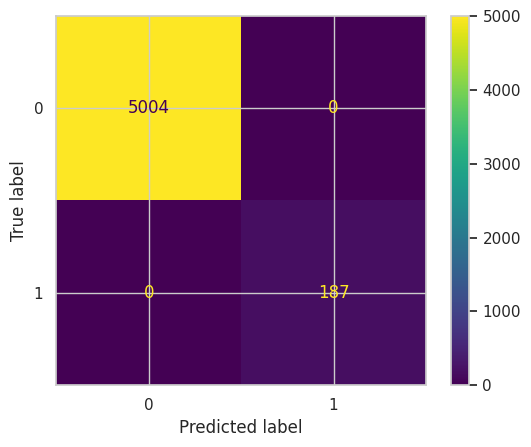

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score
)
from sklearn.cluster import KMeans
import plotly.express as px
import tabulate
from imblearn.under_sampling import RandomUnderSampler

order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

recent_sales = order_total[
    (order_total['Created at'].dt.month.isin([9, 10])) & 
    (order_total['Created at'].dt.year == 2024)
].copy()
recent_product_sales = recent_sales.groupby('Lineitem name').size().reset_index(name='Recent Order Count')

historical_sales = order_total.groupby('Lineitem name').size().reset_index(name='Historical Order Count')

combined_sales = pd.merge(
    recent_product_sales, 
    historical_sales, 
    on='Lineitem name', 
    how='outer'
).fillna(0)

combined_sales['Weighted_Order_Count'] = (
    0.8 * combined_sales['Recent Order Count'] + 
    0.2 * combined_sales['Historical Order Count']
)

combined_sales['Target'] = np.where(
    combined_sales['Recent Order Count'] > 0, 1, 0
)

train_data = combined_sales[combined_sales['Recent Order Count'] == 0]
test_data = combined_sales[combined_sales['Recent Order Count'] > 0]
common_rows = pd.merge(train_data, test_data, on=['Lineitem name'], how='inner')
print(f"Número de filas comunes entre entrenamiento y prueba: {len(common_rows)}")

scaler = StandardScaler()
X = scaler.fit_transform(combined_sales[['Recent Order Count', 'Historical Order Count']])
y = combined_sales['Target']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42
)

print("Distribución en y_train:", np.bincount(y_train))
print("Distribución en y_val:", np.bincount(y_val))
print("Distribución en y_test:", np.bincount(y_test))

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

print("Distribución después del undersampling:", np.bincount(y_train_resampled))

param_grid = {'C': [0.001, 0.01, 0.1], 'max_iter': [500]}
strat_kfold = StratifiedKFold(n_splits=5)

log_reg = LogisticRegression(class_weight='balanced')

grid_search = GridSearchCV(
    log_reg, param_grid, cv=strat_kfold, scoring='roc_auc', error_score='raise'
)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")

y_val_pred = best_model.predict(X_val)
y_val_prob = best_model.predict_proba(X_val)[:, 1]

print("Reporte de validación:\n", classification_report(y_val, y_val_pred))
print(f"AUC-ROC en validación: {roc_auc_score(y_val, y_val_prob):.4f}")

y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

print("Reporte de prueba:\n", classification_report(y_test, y_test_pred))
print(f"AUC-ROC en prueba: {roc_auc_score(y_test, y_test_prob):.4f}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

correlation_matrix = pd.DataFrame(X, columns=['Recent Order Count', 'Historical Order Count']).corr()
print("Matriz de correlación:\n", correlation_matrix)

combined_sales['Prediction_Probability'] = best_model.predict_proba(X)[:, 1]

threshold = 0.6
top_predictions = combined_sales[combined_sales['Prediction_Probability'] > threshold]
top_predictions = top_predictions.sort_values(by='Prediction_Probability', ascending=False).head(15)

print("Top 15 productos más probables para noviembre 2024:")
formatted_table = tabulate.tabulate(
    top_predictions[['Lineitem name', 'Prediction_Probability']],
    headers=['Producto', 'Probabilidad de Venta'],
    tablefmt='fancy_grid'
)
print(formatted_table)

customer_data = recent_sales.groupby('Email').agg(
    Total_Spent=('Total', 'sum'),  
    Order_Count=('Id', 'count')     
).reset_index()

customer_data['Log_Total_Spent'] = np.log1p(customer_data['Total_Spent'])
customer_data_scaled = scaler.fit_transform(customer_data[['Log_Total_Spent', 'Order_Count']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

fig = px.scatter(
    customer_data, 
    x='Log_Total_Spent', 
    y='Order_Count', 
    color='Cluster', 
    title='Clustering de Clientes (Log del Total Gastado)',
    labels={'Log_Total_Spent': 'Log(1 + Total Gastado)', 'Order_Count': 'Número de Órdenes'},
    hover_data=['Email'],  
    size='Order_Count',  
    size_max=12,  
    template='plotly_dark'
)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_yaxes(range=[0, customer_data['Order_Count'].max() + 2])
fig.show()


## HEATMAP DE VENTAS

In [174]:
import pandas as pd
import plotly.express as px

# Ensure 'Created at' is in datetime format
order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

# Filter only sales from November 2023
order_total = order_total[
    (order_total['Created at'].dt.year == 2023) &
    (order_total['Created at'].dt.month == 11)
]
order_total['Day'] = order_total['Created at'].dt.day_name()
order_total['Hour'] = order_total['Created at'].dt.strftime('%I %p')  # 12-hour format (AM/PM)

# Group sales by day and hour
sales_by_day_hour = order_total.groupby(['Day', 'Hour'])['Total'].sum().reset_index()

# Create a pivot table for the heatmap
pivot_table = sales_by_day_hour.pivot(index='Day', columns='Hour', values='Total').fillna(0)

# Round values to eliminate decimals
pivot_table = pivot_table.round(0).astype(int)  # Round and convert to integers

# Create the heatmap with Plotly
fig = px.imshow(
    pivot_table,
    text_auto=True,  # Display values in the cells
    aspect="auto",  # Automatically adjust the aspect ratio
    color_continuous_scale='Blues',
    title='Sales Heatmap by Day and Hour (November 2023)',
    labels=dict(color="Total Sales ($)")
)

# Adjust the layout for better presentation
fig.update_layout(
    xaxis_title="Hour",
    yaxis_title="Day",
    font=dict(size=12)
)

# Display the chart
fig.show()


In [175]:
import pandas as pd
import plotly.express as px

# Ensure 'Created at' is in datetime format
order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

# Filter only orders from November 2023
order_total = order_total[
    (order_total['Created at'].dt.year == 2023) &
    (order_total['Created at'].dt.month == 11)
]

# Extract the day and hour in AM/PM format
order_total['Day'] = order_total['Created at'].dt.day_name()
order_total['Hour'] = order_total['Created at'].dt.strftime('%I %p')  # 12-hour format (AM/PM)

# Count the number of orders by day and hour
orders_by_day_hour = order_total.groupby(['Day', 'Hour']).size().reset_index(name='Order Count')

# Create a pivot table for the heatmap
pivot_table = orders_by_day_hour.pivot(index='Day', columns='Hour', values='Order Count').fillna(0)

# Ensure values are integers
pivot_table = pivot_table.astype(int)

# Create the heatmap with Plotly
fig = px.imshow(
    pivot_table,
    text_auto=True,  # Display the number of orders in the cells
    aspect="auto",  # Automatically adjust the aspect ratio
    color_continuous_scale='Blues',
    title='Heatmap of Number of Orders by Day and Hour (November 2023)',
    labels=dict(color="Number of Orders")
)

# Adjust the layout for better presentation
fig.update_layout(
    xaxis_title="Hour",
    yaxis_title="Day",
    font=dict(size=12)
)

# Display the chart
fig.show()


In [176]:
import pandas as pd
import plotly.express as px

# Ensure 'Created at' is in datetime format
order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

# Filter only orders from November 2023
order_total = order_total[
    (order_total['Created at'].dt.year == 2023) &
    (order_total['Created at'].dt.month == 11)
]

# Group by product and count the total number of orders
top_products = order_total.groupby('Lineitem name').size().reset_index(name='Order Count')

# Sort products by order count in descending order
top_15_products = top_products.sort_values(by='Order Count', ascending=False).head(15)

# Create a vertical bar chart with adjusted size
fig = px.bar(
    top_15_products,
    x='Lineitem name',
    y='Order Count',
    title='Top 15 Best-Selling Products (November 2023)',
    labels={'Order Count': 'Number of Orders', 'Lineitem name': 'Product'},
    text='Order Count'  # Display the number of orders on the bars
)

# Improve the chart formatting
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Number of Orders",
    xaxis_tickangle=-25,  # Rotate labels for better readability
    height=600,  # Increase chart height
    width=1200,  # Increase chart width
    font=dict(size=12),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),  # Light grid on Y-axis
    bargap=0.1  # Reduce space between bars for a fuller appearance
)

fig.update_traces(
    textfont_size=14,
    textposition='outside',  # Ensure text does not overlap with bars
    marker=dict(color='royalblue', line=dict(color='black', width=1))  # Black borders
)

# Set Y-axis range with a little extra space at the top
fig.update_yaxes(range=[0, top_15_products['Order Count'].max() + 10])

# Display the chart
fig.show()


# EXTRA DASHBOARDS

In [177]:
threshold = 500  # Define threshold for grouping into 'Others'
sales_by_traffic['referrer_name_grouped'] = sales_by_traffic['referrer_name'].where(
    sales_by_traffic['total_sales'] >= threshold, 'Others'
)

sales_by_traffic_grouped = sales_by_traffic.groupby(
    ['referrer_source', 'referrer_name_grouped'], as_index=False
)['total_sales'].sum()

fig = px.bar(
    sales_by_traffic_grouped, 
    x='referrer_source', 
    y='total_sales', 
    color='referrer_name_grouped', 
    title='Total Sales by Traffic Source',
    labels={'total_sales': 'Total Sales', 'referrer_source': 'Traffic Source'},
    text='total_sales',  # Display values on bars
    height=600, 
    width=1000
)

fig.update_layout(
    yaxis_tickformat=',',  
    xaxis_tickangle=-45,  
    legend=dict(
        title='Referrer Name',
        orientation='h',  # Horizontal legend
        y=-0.3,  # Move legend down
        xanchor='center',
        x=0.5
    ),
    plot_bgcolor='rgba(0,0,0,0)',  
    bargap=0.15 
)

fig.update_yaxes(type='log')

fig.show()



In [178]:
import plotly.express as px

# Filter the top 10 best-selling products and sort by total sales
top_10_sales = sales_by_product.sort_values(by='total_sales', ascending=False).head(10)

# Create the bar chart
fig = px.bar(
    top_10_sales, 
    x='product_title', 
    y='total_sales', 
    color='product_vendor', 
    title='Top 10 Best-Selling Products',
    labels={'product_title': 'Product', 'total_sales': 'Total Sales (S/.)'},
    text='total_sales'  # Display sales directly on the bars
)

# Adjust layout for better visualization
fig.update_layout(
    height=600,  # Increase chart height
    width=1200,  # Increase chart width
    xaxis_tickangle=-25,  # Slightly rotate x-axis labels
    bargap=0.3,  # Increase bar gap for clarity
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    legend=dict(
        title='Vendor',
        orientation='h',  # Horizontal legend
        y=-0.3,  # Move the legend down
        xanchor='center',
        x=0.5
    )
)

# Enhance text size and position
fig.update_traces(
    texttemplate='%{text:,.2f}',  # Format text with 2 decimal places and commas
    textposition='outside',  # Place text outside the bars
    textfont_size=14  # Increase text size
)

# Highlight the top-selling product with an annotation
max_product = top_10_sales.iloc[0]  # Get the top-selling product
fig.add_annotation(
    x=max_product['product_title'], 
    y=max_product['total_sales'], 
    text="Top-Selling Product!",
    showarrow=True,
    arrowhead=2,
    ax=0, 
    ay=-40,
    font=dict(color='crimson', size=14),
    align='center'
)

# Display the figure
fig.show()


In [179]:
import pandas as pd
import plotly.express as px

fecha_columna = 'fecha'  

if fecha_columna not in sales_over_time.columns:
    raise ValueError(f"La columna '{fecha_columna}' no se encuentra en el DataFrame.")

# Convertir la columna de fechas a datetime
sales_over_time[fecha_columna] = pd.to_datetime(sales_over_time[fecha_columna], errors='coerce')

# Establecer la columna de fechas como índice
sales_over_time = sales_over_time.set_index(fecha_columna)

# Eliminar filas con fechas nulas en el índice
sales_over_time = sales_over_time[~sales_over_time.index.isna()]

# Asegurarse de que las fechas estén ordenadas
sales_over_time = sales_over_time.sort_index()

# Crear el gráfico de líneas con los datos corregidos
fig = px.line(
    sales_over_time,
    x=sales_over_time.index,
    y='total_sales',
    title='Tendencia de Ventas a lo Largo del Tiempo',
    labels={'x': 'Fecha', 'total_sales': 'Ventas Totales'},
    markers=True  # Mostrar marcadores en los puntos de datos
)

# Ajustar el diseño
fig.update_layout(
    height=600,
    width=1200,
    xaxis=dict(
        tickformat='%d-%m-%Y',  # Formato de fecha legible
        rangeslider=dict(visible=True),  # Control de rango para explorar datos
        showgrid=True
    ),
    yaxis=dict(showgrid=True)
)

# Añadir línea de tendencia suavizada (promedio móvil de 30 días)
fig.add_scatter(
    x=sales_over_time.index,
    y=sales_over_time['total_sales'].rolling(window=30).mean(),
    mode='lines',
    name='Tendencia Suavizada',
    line=dict(color='crimson', width=2, dash='dash')
)

# Mostrar el gráfico
fig.show()




ValueError: La columna 'fecha' no se encuentra en el DataFrame.

In [77]:
import numpy as np
import plotly.express as px

# Calculate the total number of customers who accept and don't accept email marketing
accepts_counts = customers_export['Accepts Email Marketing'].value_counts()

# Create the scatter plot
fig = px.scatter(
    customers_export,
    x='Total Orders',
    y='Total Spent',
    color='Accepts Email Marketing',
    size='Total Spent',
    size_max=15,
    opacity=0.6,
    title='Customer Segmentation: Orders vs Total Spending',
    labels={'Total Orders': 'Total Orders', 'Total Spent': 'Total Spending ($)'},
    hover_data=['Email', 'Total Orders', 'Total Spent'],
    color_discrete_map={'yes': 'green', 'no': 'red'}
)

# Manually calculate the trend line
x = customers_export['Total Orders']
y = customers_export['Total Spent']
m, b = np.polyfit(x, y, 1)  # Slope and intercept

# Add the trend line
fig.add_scatter(
    x=x,
    y=m * x + b,
    mode='lines',
    name='Trend Line',
    line=dict(color='blue', dash='dash')
)

# Add a text box showing the totals for 'yes' and 'no'
fig.add_annotation(
    x=1.05, y=1, xref='paper', yref='paper',
    text=(
        f"<b>Total Customers:</b><br>"
        f"<span style='color:green'>Yes: {accepts_counts.get('yes', 0)}</span><br>"
        f"<span style='color:red'>No: {accepts_counts.get('no', 0)}</span>"
    ),
    showarrow=False,
    align='left',
    font=dict(size=12),
    bordercolor='black',
    borderwidth=1,
    borderpad=5,
    bgcolor='white',
    opacity=0.8
)

# Adjust layout to make room for the annotation
fig.update_layout(
    height=600,
    width=1200,
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend=dict(
        title='Accepts Email Marketing',
        orientation='h',
        y=-0.2,
        xanchor='center',
        x=0.5
    )
)

# Show the plot
fig.show()



In [80]:
import plotly.express as px

# Sort the data by total sales in descending order
sales_sorted = sales.sort_values(by='total_sales', ascending=False)

# Create the enhanced bar chart
fig = px.bar(
    sales_sorted,
    x='api_client_title',
    y='total_sales',
    color='api_client_title',
    text='total_sales',  # Display sales on the bars
    title='Sales by Sales Channel',
    labels={'api_client_title': 'Sales Channel', 'total_sales': 'Total Sales ($)'},
    height=600,
    width=1000
)

# Adjust the layout
fig.update_layout(
    bargap=0.3,  # Increase space between bars
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    xaxis=dict(
        title='Sales Channel',
        tickangle=-30,  # Slightly rotate x-axis labels
        categoryorder='total descending'  # Order bars from highest to lowest
    ),
    yaxis=dict(
        title='Total Sales ($)',
        type='log',  # Use logarithmic scale for better visual comparison
        showgrid=True, gridcolor='lightgrey'
    ),
    legend=dict(
        title='Sales Channel',
        orientation='h',  # Horizontal legend
        y=-0.3,
        xanchor='center',
        x=0.5
    )
)

# Adjust the text format on the bars
fig.update_traces(
    texttemplate='%{text:.2s}',  # Abbreviate large numbers
    textposition='outside'
)

# Annotate the channel with the highest sales
max_sales = sales_sorted.iloc[0]
fig.add_annotation(
    x=max_sales['api_client_title'],
    y=max_sales['total_sales'],
    text=f"Highest Sale: ${max_sales['total_sales']:,}",
    showarrow=True,
    arrowhead=2,
    ax=0, 
    ay=-40,
    font=dict(color='crimson', size=12)
)

# Display the chart
fig.show()


In [87]:
import plotly.express as px

# Sort products by total magnitude (sum of discounts and returns)
sales_top_products = sales_by_product.assign(
    total_amount=lambda df: df['discounts'].abs() + df['returns'].abs()
).nlargest(15, 'total_amount')

# Create a stacked bar chart
fig = px.bar(
    sales_top_products,
    x='product_title',
    y=['discounts', 'returns'],
    barmode='relative',  # Stack the bars
    title='Top 15 Products with Discounts and Returns',
    labels={'product_title': 'Product', 'value': 'Amount ($)'},
    height=700,  # Increase chart height
    width=1400,  # Increase chart width
    color_discrete_map={'discounts': 'blue', 'returns': 'red'}  # Differentiate colors
)

# Adjust chart layout
fig.update_layout(
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels
        title='Product',
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        title='Amount (S/.)',
        showgrid=True, gridcolor='lightgrey'
    ),
    legend=dict(
        title='Variable',
        orientation='h',  # Horizontal legend
        y=-0.3,  # Move the legend down
        xanchor='center',
        x=0.5
    ),
    bargap=0.3  # Increase space between bars
)

# Annotate the product with the highest discount and highest return
max_discount = sales_top_products.loc[sales_top_products['discounts'].idxmax()]
max_return = sales_top_products.loc[sales_top_products['returns'].idxmax()]

fig.add_annotation(
    x=max_discount['product_title'],
    y=max_discount['discounts'] + 50,  # Move annotation higher
    text=f"Highest Discount: ${max_discount['discounts']:.2f}",
    showarrow=True,
    arrowhead=2,
    ax=0, 
    ay=-70,  # Offset to avoid overlap
    font=dict(color='black', size=12)
)

fig.add_annotation(
    x=max_return['product_title'],
    y=max_return['returns'] - 50,  # Move annotation lower
    text=f"Highest Return: ${max_return['returns']:.2f} ",
    showarrow=True,
    arrowhead=2,
    ax=0, 
    ay=70,  # Offset to avoid overlap
    font=dict(color='black', size=12)
)

# Adjust text position on bars
fig.update_traces(
    texttemplate='%{y:.2f}',
    textposition='outside',
    cliponaxis=False  # Prevent text from being clipped
)

# Display the chart
fig.show()


In [94]:
import plotly.express as px
import pandas as pd

# Crear una tabla detallada con los principales datos
tabla_detallada = sales_by_traffic[['referrer_source', 'referrer_name', 'orders', 'total_sales']].nlargest(5, 'total_sales')

# Crear el scatter plot
fig = px.scatter(
    sales_by_traffic,
    x='orders',
    y='total_sales',
    color='referrer_source',
    size='total_sales',
    hover_data=['referrer_name', 'orders', 'total_sales'],
    title='Pedidos vs Ventas por Fuente de Tráfico',
    labels={'orders': 'Número de Pedidos', 'total_sales': 'Ventas Totales (S/.)'},
    height=700,
    width=1200,
    size_max=40,
    opacity=0.7,
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Formatear la información de la tabla con más detalle
tabla_text = "<br>".join([f"{row['referrer_source']} - {row['referrer_name']}: {row['orders']} pedidos, {row['total_sales']} S/."
                          for _, row in tabla_detallada.iterrows()])

# Añadir la anotación al gráfico con la tabla detallada
fig.add_annotation(
    text=tabla_text,
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=1.05,
    y=0.5,
    bordercolor='black',
    borderwidth=1,
    bgcolor='white',
    font=dict(size=12)
)

# Ajustar el layout para una mejor visualización
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend=dict(
        title='Fuente de Tráfico',
        orientation='h',
        y=-0.2,
        x=0.5,
        xanchor='center',
        bordercolor='black',
        borderwidth=1
    )
)

# Mostrar el gráfico
fig.show()


In [44]:
sales_over_time['Fecha'] = pd.date_range(start='2023-11-01',periods=len(sales_over_time))

sales_over_time['Day'] = sales_over_time['Fecha'].dt.day_name()
sales_over_time['Hour'] = sales_over_time['Fecha'].dt.hour

fig = px.density_heatmap(
    sales_over_time,
    x = 'Hour',
    y='Day',
    z='total_sales',
    title='Heatmap de Ventas por Dia y hora',
    labels={'total_sales':'Ventas Totales'}
)

fig.show()

In [46]:
import plotly.express as px

fig = px.line(
    sales_over_time,
    x='Fecha',
    y='total_sales',
    color='product_vendor',
    title='ventas por producto a largo del tiempo',
    labels ={'Fecha':'Fecha','total_sales':'ventas totales'}
)

fig.show()

In [47]:
fig = px.bar(
    customers_export.sort_values(by='Total Orders', ascending=False).head(10),
    x='First Name',
    y='Total Orders',
    color ='Total Spent',
    title='Top 10 clientes por numero de pedido',
    labels= {'First Name':'Cliente','Total Orders': 'Pedidos Totales'}
)
fig.show()